# Análise - Airbnb Latam

Você trabalha na divisão América Latina do Airbnb e está comparando a operação do Airbnb nos 4 principais países da empresa na região: Brasil, México, Argentina e Colômbia. Um dos objetivos da divisão é aumentar a quantidade de diárias reservadas por turistas estrangeiros nas hospedagens disponíveis na América Latina.

In [1]:
# Importando as libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Caminho do csv
path = '../data/Airbnb.xlsx'

In [3]:
# Ler csv
df = pd.read_excel(path)

In [4]:
# Mostrando o df
df.head()

,Nome do local,Localização,País,Tipo de acomodação,Classificação,Comodidades,Políticas de cancelamento,Preço,Número de reservas no ano,Número de Fotos
0,Hostel Montanha,San Andrés,Colômbia,Hostel,5 estrelas,"Wi-Fi, café da manhã",7 dias antes,30,11,5
1,Mirliban,Buenos Aires,Argentina,Apartamento,5 estrelas,"Wi-Fi, ar condicionado",72 horas,10,25,7
2,Estrela Dourada,Guadalajara,México,Hotel,5 estrelas,"Piscina, recepção",reembolsável,14,73,12
3,Mar Azul Beach,Fortaleza,Brasil,Hotel,5 estrelas,"Wi-Fi, armários",48 horas antes,35,162,2
4,Montanha Mágica,Curitiba,Brasil,Quarto,4 estrelas,"Piscina, churrasqueira",7 dias antes,48,200,2


In [5]:
# Tamanho do df (linhas x colunas)
df.shape

(49, 10)

In [6]:
# Informações do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Nome do local              49 non-null     object
 1   Localização                49 non-null     object
 2   País                       49 non-null     object
 3   Tipo de acomodação         49 non-null     object
 4   Classificação              49 non-null     object
 5   Comodidades                49 non-null     object
 6   Políticas de cancelamento  49 non-null     object
 7   Preço                      49 non-null     int64 
 8   Número de reservas no ano  49 non-null     int64 
 9   Número de Fotos            49 non-null     int64 
dtypes: int64(3), object(7)
memory usage: 4.0+ KB


## 1. Analise as principais métricas aos preços das diárias nos 4 países e compartilhe os 3 principais insights que você teve ao compará-las entre os países.

In [7]:
# Verificando as métricas de preço dos 4 países
df.groupby('País')['Preço'].describe()

,count,mean,std,min,25%,50%,75%,max
País,,,,,,,,
Argentina,10.0,168.100000,78.297793,10.0,137.00,183.5,223.75,272.0
Brasil,15.0,163.200000,81.600245,35.0,101.50,170.0,218.50,300.0
Colômbia,14.0,145.928571,61.537311,30.0,114.75,160.0,193.50,249.0
México,10.0,152.700000,72.562693,14.0,139.00,156.5,183.25,289.0


A Argentina apresenta o menor número de reservas (10), mas se destaca com:

- A maior média e mediana de valores
- Um dos menores desvios padrão

Isso indica que os preços das reservas são consistentes e pouco dispersos, mostrando homogeneidade nos valores.

O Brasil lidera em quantidade de reservas (15), com média de US$163,20. Aqui observamos:

- Desvio padrão equivalente à metade da média (alta variabilidade)
- Maior reserva individual (US$300,00)

Esses dados revelam uma grande dispersão nos preços, oferecendo desde opções acessíveis até valores significativamente altos.

A Colômbia aparece como segundo lugar em número de reservas (14) e mostra:

- A menor média de preços
- O menor desvio padrão (valores muito próximos da média)

Maior reserva (US$249,00) ainda abaixo dos outros países.
Esta combinação sugere que a Colômbia oferece o melhor custo-benefício, com preços mais homogêneos e acessíveis.

Podemos também calcular o CV - Coeficiente de Variação, para termos uma ideia melhor da dispersão dos dados.

In [8]:
# Calculando o coeficiente de variação
std = df.groupby('País')['Preço'].std()
mean = df.groupby('País')['Preço'].mean()
cv = std/mean * 100 # CV dado em porcentagem
cv

País
Argentina    46.578104
Brasil       50.000150
Colômbia     42.169474
México       47.519773
Name: Preço, dtype: float64

Como o CV é uma medida relativa (não atrelada a unidades de medida), ele nos fornece uma visão mais precisa sobre a dispersão dos dados. Observamos que:

**1. Brasil:** Confirma-se como o país com dados mais dispersos quando analisamos o CV, reforçando a conclusão anterior sobre sua alta variabilidade.

**2. México:** Apresenta um caso interessante - embora tenha o segundo menor desvio padrão absoluto, seu CV revela que os dados possuem uma dispersão relativa significativa. Isso indica que:

- A variabilidade dos valores é proporcionalmente alta em relação à sua média
- Apesar da aparente estabilidade sugerida pelo desvio padrão absoluto, os preços têm uma distribuição relativamente ampla quando consideramos sua escala

**Interpretação complementar:**
O caso do México demonstra como o CV pode revelar insights que o desvio padrão sozinho não mostra, especialmente quando comparamos conjuntos de dados com médias diferentes. Enquanto o desvio padrão absoluto sugeriria baixa dispersão, o CV nos alerta que, proporcionalmente, os valores mexicanos têm uma variação considerável.

## 2. Crie um gráfico com a quantidade de imóveis por intervalos de preço no Brasil e diga qual dos padrões de distribuição estudados mais se assemelha ao gráfico montado.

In [9]:
df_brasil = df[df['País'] == 'Brasil']
df_brasil

,Nome do local,Localização,País,Tipo de acomodação,Classificação,Comodidades,Políticas de cancelamento,Preço,Número de reservas no ano,Número de Fotos
3,Mar Azul Beach,Fortaleza,Brasil,Hotel,5 estrelas,"Wi-Fi, armários",48 horas antes,35,162,2
4,Montanha Mágica,Curitiba,Brasil,Quarto,4 estrelas,"Piscina, churrasqueira",7 dias antes,48,200,2
5,Oasis Tropical,Salvador,Brasil,Casa,3 estrelas,"Estacionamento, água quente",72 horas,65,37,1
10,Brisa do Mar,Belo Horizonte,Brasil,Sítio,4 estrelas,"Piscina, recepção",reembolsável,95,15,8
14,Refúgio da Natureza,São Paulo,Brasil,Hostel,2 estrelas,"Spa, praia",reembolsável,108,122,14
15,lha dos Coqueiros,Foz do Iguaçú,Brasil,Apartamento,4 estrelas,"Wi-Fi, recepção 24 horas",48 horas antes,132,48,13
22,Cidade dos Sonhos,Salvador,Brasil,Apartamento,2 estrelas,"Spa, praia",reembolsável,174,154,1
29,Villa dos Ventos Beach Resort,Fortaleza,Brasil,Hotel,5 estrelas,"Estacionamento, água quente",72 horas,163,165,11
37,Cidade dos Sonhos do Norte Hotel,São Paulo,Brasil,Hotel,5 estrelas,"Estacionamento, água quente",72 horas,207,147,13
38,Encanto do Mar Hotel & Spa,Manaus,Brasil,Quarto,2 estrelas,"Spa, praia",reembolsável,230,23,13


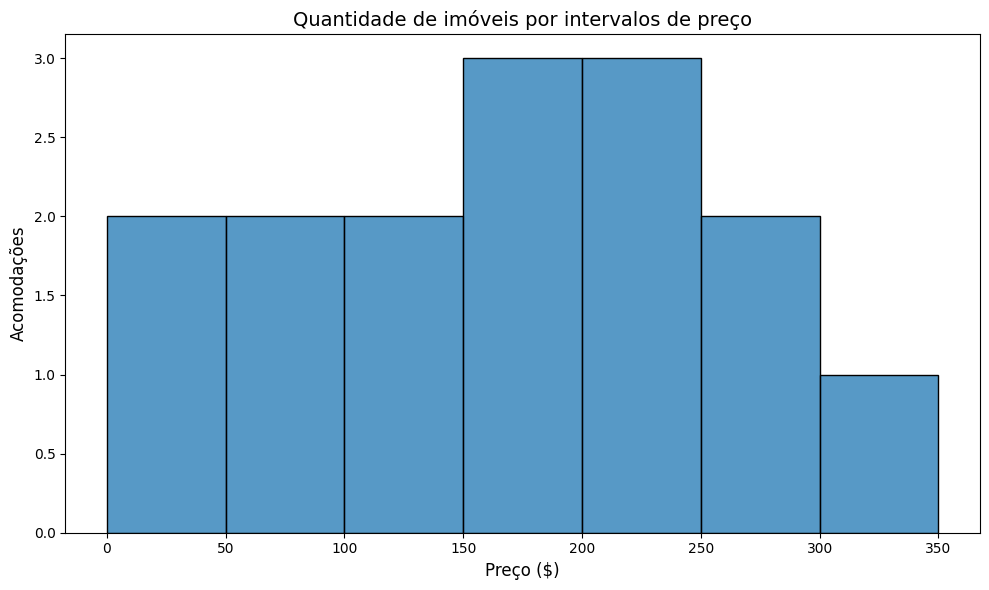

In [10]:
# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando o histograma no eixo `ax`
sns.histplot(df_brasil['Preço'], bins=range(0, 400, 50), ax=ax)

# Personalizando os rótulos
ax.set_title('Quantidade de imóveis por intervalos de preço', fontsize=14)
ax.set_xlabel('Preço ($)', fontsize=12)
ax.set_ylabel('Acomodações', fontsize=12)

# Ajustando layout para evitar cortes
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [11]:
skew = df_brasil['Preço'].skew()
print(f'Assimetria: {skew:.2f}')

Assimetria: -0.05


Para recordarmos:
- Skew = 0, distribuição simétrica
- Skew > 0, distribuição assimétrica positiva (à direita)
- Skew < 0, distribuição assimétrica negativa (à esquerda)

Dizemos que os dados são aproximadamente normais se -1 < Skew < 1.

Observando o gráfico e a skew (assimetria), podemos ver que distribuição dos Preços são aproximadamente normais.

## 3. Monte o funil de conversão de um visitante para reservar uma hospedagem em cada um dos 4 países, destacando os percentuais em cada etapa e depois responder às seguintes perguntas:
- Qual país possui a maior conversão geral, da home à conclusão da reserva, durante o ano de 2022?
- Em qual etapa do funil existe maior perda de visitantes em cada um dos países?

In [12]:
df_br = pd.read_excel(path, sheet_name="Fluxo de reserva de imóvel - Br", nrows=24)
pd.set_option("display.float_format", "{:.0f}".format)

In [13]:
df_br.head()

,Mês,Home,Resultado de busca,Detalhes do imóvel,Check-out,Conclusão da reserva
0,2021-01-01,14583827,11521224,10023465,7617833,5256305
1,2021-02-01,14574634,11513961,10017146,7613031,5252991
2,2021-03-01,15303366,12089659,10518004,7993683,5515641
3,2021-04-01,16068534,12694142,11043904,8393367,5791423
4,2021-05-01,16871961,13328849,11596099,8813035,6080994


### Brasil

Funil 1: Da etapa Home para Resultado de Busca

In [14]:
(df_br['Resultado de busca'].sum()/df_br['Home'].sum()).round(2)

np.float64(0.79)

Funil 2: Da etapa Resultado de busca para Detalhes do imóvel

In [15]:
(df_br['Detalhes do imóvel'].sum()/df_br['Resultado de busca'].sum()).round(2)

np.float64(0.87)

Funil 3: Da etapa Detalhes do imóvel para Check-out

In [16]:
(df_br['Check-out'].sum()/df_br['Detalhes do imóvel'].sum()).round(2)

np.float64(0.76)

Funil 4: Da etapa Check-out para Conclusão da reserva

In [17]:
(df_br['Conclusão da reserva'].sum()/df_br['Check-out'].sum()).round(2)

np.float64(0.69)

Vamos calcular a queda percentual entre cada etapa:

1. Da etapa 1 para etapa 2: (0.79 - 0.87)/0.79 = -0.1013 ou -10.13%
2. Da etapa 2 para etapa 3: (0.87 - 0.76)/0.87 = 0.1264 ou 12.64%
3. Da etapa 3 para etapa 4: (0.76 - 0.69)/0.76 = 0.0921 ou 9.21%

Por fim, a conversão geral:

Conversão geral = Etapa 1 × Etapa 2 × Etapa 3 × Etapa 4  
Conversão geral = 0.79 × 0.87 × 0.76 × 0.69  
Conversão geral ≈ 0.36

Conclui-se que:

- No Brasil, a maior perda de visitantes ocorre "Da etapa Detalhes do Imóvel para Check-out"
- A conversão geral no Brasil é de 36%.

### Colômbia

In [18]:
df_colombia = pd.read_excel(path, sheet_name="Fluxo de reserva de imóvel - Br", skiprows=30, nrows=28)
pd.set_option("display.float_format", "{:.0f}".format)

In [19]:
df_colombia.head()

,Mês,Home,Resultado de busca,Detalhes do imóvel,Check-out,Conclusão da reserva
0,2021-01-01,11566484,9368852,5808688,4066082,1463789
1,2021-02-01,11559193,9362946,5805027,4063519,1462867
2,2021-03-01,12137152,9831093,6095278,4266695,1536010
3,2021-04-01,12744010,10322648,6400042,4480029,1612811
4,2021-05-01,13381211,10838781,6720044,4704031,1693451


Funil 1: Da etapa Home para Resultado de Busca

In [20]:
(df_colombia['Resultado de busca'].sum()/df_colombia['Home'].sum()).round(2)

np.float64(0.81)

Funil 2: Da etapa Resultado de busca para Detalhes do imóvel

In [21]:
(df_colombia['Detalhes do imóvel'].sum()/df_colombia['Resultado de busca'].sum()).round(2)

np.float64(0.62)

Funil 3: Da etapa Detalhes do imóvel para Check-out

In [22]:
(df_colombia['Check-out'].sum()/df_colombia['Detalhes do imóvel'].sum()).round(2)

np.float64(0.7)

Funil 4: Da etapa Check-out para Conclusão da reserva

In [23]:
(df_colombia['Conclusão da reserva'].sum()/df_colombia['Check-out'].sum()).round(2)

np.float64(0.36)

Vamos calcular a queda percentual entre cada etapa:

1. Da etapa 1 para etapa 2: (0.81 - 0.62)/0.81 = 0.23 ou 23%
2. Da etapa 2 para etapa 3: (0.62 - 0.7)/0.62 = -0.129 ou -12.90%
3. Da etapa 3 para etapa 4: (0.7 - 0.36)/0.7 = 0.48 ou 48%

Por fim, a conversão geral:

Conversão geral = Etapa 1 × Etapa 2 × Etapa 3 × Etapa 4  
Conversão geral = 0.81 × 0.62 × 0.7 × 0.36  
Conversão geral ≈ 0.12

Conclui-se que:

- Na Colômbia, a maior perda de visitantes ocorre "Da etapa Check-out para Conclusão da reserva"
- A conversão geral na Colômbia é de 12%.

### México

In [24]:
df_mexico = pd.read_excel(path, sheet_name="Fluxo de reserva de imóvel - Br", skiprows=60, nrows=25)
pd.set_option("display.float_format", "{:.0f}".format)

In [25]:
df_mexico.head()

,Mês,Home,Resultado de busca,Detalhes do imóvel,Check-out,Conclusão da reserva
0,2021-01-01,12371109,7546376,6640811,3918079,3056101
1,2021-02-01,12363311,7541619,6636625,3915609,3054175
2,2021-03-01,12981476,7918700,6968456,4111389,3206884
3,2021-04-01,13630550,8314635,7316879,4316959,3367228
4,2021-05-01,14312077,8730367,7682723,4532807,3535589


Funil 1: Da etapa Home para Resultado de Busca

In [26]:
(df_mexico['Resultado de busca'].sum()/df_mexico['Home'].sum()).round(2)

np.float64(0.61)

Funil 2: Da etapa Resultado de busca para Detalhes do imóvel

In [27]:
(df_mexico['Detalhes do imóvel'].sum()/df_mexico['Resultado de busca'].sum()).round(2)

np.float64(0.88)

Funil 3: Da etapa Detalhes do imóvel para Check-out

In [28]:
(df_mexico['Check-out'].sum()/df_mexico['Detalhes do imóvel'].sum()).round(2)

np.float64(0.59)

Funil 4: Da etapa Check-out para Conclusão da reserva

In [29]:
(df_mexico['Conclusão da reserva'].sum()/df_mexico['Check-out'].sum()).round(2)

np.float64(0.78)

Vamos calcular a queda percentual entre cada etapa:

1. Da etapa 1 para etapa 2: (0.61 - 0.88)/0.61 = -0.44 ou -44%
2. Da etapa 2 para etapa 3: (0.88 - 0.59)/0.88 = 0.32 ou 32%
3. Da etapa 3 para etapa 4: (0.59 - 0.78)/0.59 = -0.32 ou -32%

Por fim, a conversão geral:

Conversão geral = Etapa 1 × Etapa 2 × Etapa 3 × Etapa 4  
Conversão geral = 0.61 × 0.88 × 0.59 × 0.78 
Conversão geral ≈ 0.24

Conclui-se que:

- No México, a maior perda de visitantes ocorre "Da etapa Detalhes do Imóvel para Check-out"
- A conversão geral no México é de 24%.

### Argentina

In [30]:
df_argentina = pd.read_excel(path, sheet_name="Fluxo de reserva de imóvel - Br", skiprows=89, nrows=25)
pd.set_option("display.float_format", "{:.0f}".format)

In [31]:
df_argentina.head()

,Mês,Home,Resultado de busca,Detalhes do imóvel,Check-out,Conclusão da reserva
0,2021-01-01,10057812,7543359,4903183,2647719,1191474
1,2021-02-01,10051472,7538604,4900093,2646050,1190723
2,2021-03-01,10554046,7915534,5145097,2778353,1250259
3,2021-04-01,11081748,8311311,5402352,2917270,1312772
4,2021-05-01,11635835,8726876,5672470,3063134,1378410


Funil 1: Da etapa Home para Resultado de Busca

In [32]:
(df_argentina['Resultado de busca'].sum()/df_argentina['Home'].sum()).round(2)

np.float64(0.75)

Funil 2: Da etapa Resultado de busca para Detalhes do imóvel

In [33]:
(df_argentina['Detalhes do imóvel'].sum()/df_argentina['Resultado de busca'].sum()).round(2)

np.float64(0.65)

Funil 3: Da etapa Detalhes do imóvel para Check-out

In [34]:
(df_argentina['Check-out'].sum()/df_argentina['Detalhes do imóvel'].sum()).round(2)

np.float64(0.54)

Funil 4: Da etapa Check-out para Conclusão da reserva

In [35]:
(df_argentina['Conclusão da reserva'].sum()/df_argentina['Check-out'].sum()).round(2)

np.float64(0.45)

Vamos calcular a queda percentual entre cada etapa:

1. Da etapa 1 para etapa 2: (0.75 - 0.65)/0.75 = 0.13 ou 13%
2. Da etapa 2 para etapa 3: (0.65 - 0.54)/0.65 = 0.169 ou 16.9%
3. Da etapa 3 para etapa 4: (0.54 - 0.45)/0.54 = 0.166 ou 16.6%

Por fim, a conversão geral:

Conversão geral = Etapa 1 × Etapa 2 × Etapa 3 × Etapa 4  
Conversão geral = 0.75 × 0.65 × 0.54 × 0.45  
Conversão geral ≈ 0.118

Conclui-se que:

- Na Argentina, a maior perda de visitantes ocorre "Da etapa Detalhes do Imóvel para Check-out"
- A conversão geral no Argentina é de 11.8%.

## Qual país possui a maior conversão geral, da home à conclusão da reserva, durante o ano de 2022?

O Brasil é o país que possui maior conversão geral entre os 4 países, seguido por México, Colômbia e Argentina. Esta métrica mostra a proporção de usuários que completam a jornada de home a conclusão da reserva.

## Em qual etapa do funil existe maior perda de visitantes em cada um dos países?

A maior perda de visitantes ocorre na etapa **Detalhes do imóvel para Check-out**, isso indica uma enorme dificuldade de converter clientes.